# Classification: Feedback Explore other classifications

In [1]:
# Load libraries
import sys
import scipy
import numpy
import pandas
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# version check
print("Python: {}".format(sys.version))
print("scipy: {}".format(scipy.__version__))
print("numpy: {}".format(numpy.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("pandas: {}".format(pandas.__version__))
print("sklearn: {}".format(sklearn.__version__))
print("\n")


# Load dataset from the UCI Machine Learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
dataset = pandas.read_csv(url)
dataset.info()

dataset['Revenue'].value_counts()


Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.20.3
matplotlib: 3.4.3
pandas: 1.3.4
sklearn: 0.24.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 n

False    10422
True      1908
Name: Revenue, dtype: int64

# Data Visualization: Refer OnlineShopDataAnalysis file

# Encode data

In [2]:
def label_encoded_dataset():
    dataset_enc = pandas.read_csv(url)
    #print(str(dataset_enc.dtypes))
    print(str(dataset_enc['Revenue'].unique()))
    print(str(dataset_enc['Weekend'].unique()))
    print(str(dataset_enc['Month'].unique()))
    print(str(dataset_enc['VisitorType'].unique()))
    print(str(dataset_enc.head()))
    label_bool_mapping = {False:0, True: 1}
    dataset_enc['Revenue'] = dataset_enc['Revenue'].map(label_bool_mapping, na_action=None)
    dataset_enc['Weekend'] = dataset_enc['Weekend'].map(label_bool_mapping, na_action=None)

    label_month_mapping = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Oct':10, 'Nov':11, 'Sep':9, 'Dec':12}
    dataset_enc['Month'] = dataset_enc['Month'].map(label_month_mapping, na_action=None)
                           
    label_visitor_mapping = {'Returning_Visitor':1, 'New_Visitor':2, 'Other':3}
    dataset_enc['VisitorType'] = dataset_enc['VisitorType'].map(label_visitor_mapping, na_action=None)
    print(str(dataset_enc['Revenue'].unique()))
    print(str(dataset_enc['Weekend'].unique()))
    print(str(dataset_enc['Month'].unique()))
    print(str(dataset_enc['VisitorType'].unique()))
    return dataset_enc

dataset_encoded = label_encoded_dataset()
print(str(dataset_encoded.dtypes))

print(str(dataset_encoded.head()))


[False  True]
[False  True]
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \


# Split the data into training and test

In [3]:
X = dataset_encoded.values[:, 0:17]
y = dataset_encoded.values[:, 17]
test_size = 0.09
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11220, 17)
(11220,)
(1110, 17)
(1110,)


# Scale the training data

In [4]:
#X = dataset_encoded.values
x_std_scaler = StandardScaler().fit(X_train)
X_train_scaled = x_std_scaler.transform(X_train)
print(X_train_scaled)
print(X_train_scaled.shape)

#y_std_scaler = StandardScaler().fit(Y_train)
#y_train_scaled = y_std_scaler.transform(Y_train)
#print(y_train_scaled)


[[-0.69631267 -0.45595517 -0.39458734 ... -0.01338133 -0.40503262
  -0.55181471]
 [-0.69631267 -0.45595517 -0.39458734 ... -0.76282461 -0.40503262
  -0.55181471]
 [-0.69631267 -0.45595517 -0.39458734 ... -0.01338133 -0.40503262
  -0.55181471]
 ...
 [-0.69631267 -0.45595517 -0.39458734 ...  1.48550525 -0.40503262
  -0.55181471]
 [-0.69631267 -0.45595517 -0.39458734 ...  1.48550525 -0.40503262
  -0.55181471]
 [ 0.50600007  0.10442492 -0.39458734 ... -0.51301018 -0.40503262
  -0.55181471]]
(11220, 17)


# Hyperparameters for KNN for Scaled data

In [5]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882709 using {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.843464 (0.012042) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.843464 (0.012042) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.868330 (0.008505) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.868093 (0.008178) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.875995 (0.008360) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.875579 (0.008242) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.878610 (0.006844) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.878639 (0.006745) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.880838 (0.007454) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.880689 (0.007345) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.882561

# Hyperparameters for KNN for orginal data

In [6]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867766 using {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.828550 (0.008407) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.828550 (0.008407) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.857160 (0.007021) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.855407 (0.007631) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.863428 (0.008155) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.862864 (0.008492) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.865597 (0.008908) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.865865 (0.008464) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.866370 (0.007861) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.866875 (0.008131) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.867528

# KNN: Both scaled and non-scaled hyperparameters are same

# Hyperparameters for LinearSVM  for Scaled data

In [7]:
#from sklearn.svm import SVC

model = LinearSVC()
C = [50, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(C=C)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=[grid], cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of 

C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best: 0.882264 using {'C': 10}
0.880838 (0.008304) with: {'C': 50}
0.882264 (0.005413) with: {'C': 10}
0.880927 (0.005013) with: {'C': 1.0}
0.881105 (0.004803) with: {'C': 0.1}
0.880927 (0.004819) with: {'C': 0.01}


C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Scale the test data using "train data" scaler


In [8]:
print(X_test)
print(X_test.shape)
X_test_scaled = x_std_scaler.transform(X_test)
print(X_test_scaled)


[[  0.      0.      0.    ...   2.      1.      0.   ]
 [  2.     47.5     0.    ...   3.      1.      0.   ]
 [  1.     10.      0.    ...   1.      1.      0.   ]
 ...
 [  4.     96.8     1.    ...   2.      1.      0.   ]
 [  8.    222.875   4.    ...   2.      1.      0.   ]
 [  5.     27.4     0.    ...   2.      2.      0.   ]]
(1110, 17)
[[-0.69631267 -0.45595517 -0.39458734 ... -0.51301018 -0.40503262
  -0.55181471]
 [-0.0951563  -0.18685942 -0.39458734 ... -0.26319575 -0.40503262
  -0.55181471]
 [-0.39573449 -0.39930343 -0.39458734 ... -0.76282461 -0.40503262
  -0.55181471]
 ...
 [ 0.50600007  0.09243363  0.38913897 ... -0.51301018 -0.40503262
  -0.55181471]
 [ 1.70831281  0.80667039  2.7403179  ... -0.51301018 -0.40503262
  -0.55181471]
 [ 0.80657825 -0.30072941 -0.39458734 ... -0.51301018  2.22791405
  -0.55181471]]


# Test KNN and LinearSVC algo

In [9]:
print(y_train.shape)
print(y_test.shape)

print(numpy.unique(y_test, return_counts=True))

# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean', weights='distance')
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

print("\n KNN Y_test: " + str(y_test))
print("\n KNN knn_predictions: " + str(knn_predictions))
print("\nThe KNN accuracy score is: " + str(accuracy_score(y_test, knn_predictions)))
print("features ",  knn.n_features_in_)
print("n_samples_fit_ ",  knn.n_samples_fit_)
print("classes_ ",  knn.classes_)


# Make predictions on validation dataset
lin_svc = LinearSVC(C=10, max_iter=10000)
lin_svc.fit(X_train_scaled, y_train)
print("\n LinearSVC y_train lin_svc.coef_: " + str(lin_svc.coef_))
print("\n LinearSVC y_train lin_svc.intercept_: " + str(lin_svc.intercept_))
print("\n LinearSVC y_train lin_svc.classes_: " + str(lin_svc.classes_))
print("\n LinearSVC y_train lin_svc.n_features_in_: " + str(lin_svc.n_features_in_))
print("\n LinearSVC y_train lin_svc.n_iter_: " + str(lin_svc.n_iter_))


lin_svc_predictions = lin_svc.predict(X_test_scaled)

print("\n LinearSVC Y_test: " + str(y_test))
print("\n LinearSVC lin_svc_predictions: " + str(lin_svc_predictions))
print("\nThe LinearSVC accuracy score is: " + str(accuracy_score(y_test, lin_svc_predictions)))

(11220,)
(1110,)
(array([0., 1.]), array([930, 180], dtype=int64))

 KNN Y_test: [1. 0. 0. ... 0. 0. 1.]

 KNN knn_predictions: [0. 0. 0. ... 0. 0. 0.]

The KNN accuracy score is: 0.8648648648648649
features  17
n_samples_fit_  11220
classes_  [0. 1.]

 LinearSVC y_train lin_svc.coef_: [[-0.00686953 -0.01123125  0.0073483   0.00845639  0.0297278   0.05404922
   0.00786359 -0.09783305  0.47596815 -0.01546628  0.05502722 -0.01601602
   0.00779196 -0.0109232   0.00298381  0.02855077  0.01353251]]

 LinearSVC y_train lin_svc.intercept_: [-0.69310928]

 LinearSVC y_train lin_svc.classes_: [0. 1.]

 LinearSVC y_train lin_svc.n_features_in_: 17

 LinearSVC y_train lin_svc.n_iter_: 10000

 LinearSVC Y_test: [1. 0. 0. ... 0. 0. 1.]

 LinearSVC lin_svc_predictions: [0. 0. 0. ... 0. 0. 0.]

The LinearSVC accuracy score is: 0.8729729729729729


C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Conclusions with "revenue" and "non revenue" instances classifications

KNN hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'} 

LinerSVC hyperameters: {'C': 10}

Use the scaler fitted with training dataset for test instances 

# IGNORE BELOW Cells (They are rough sheets)

# Take the features that have -ve correlation to revenue

        BounceRates     ExitRates       Revenue
count  12330.000000  12330.000000  12330.000000
mean       0.022191      0.043073      0.154745
std        0.048488      0.048597      0.361676
min        0.000000      0.000000      0.000000
25%        0.000000      0.014286      0.000000
50%        0.003112      0.025156      0.000000
75%        0.016813      0.050000      0.000000
max        0.200000      0.200000      1.000000

 dataset_encoded plot: 



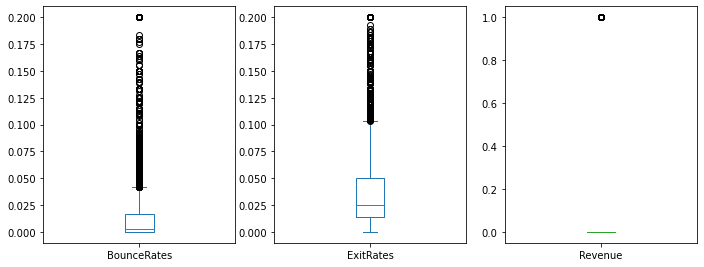


  dataset_encoded hist: 



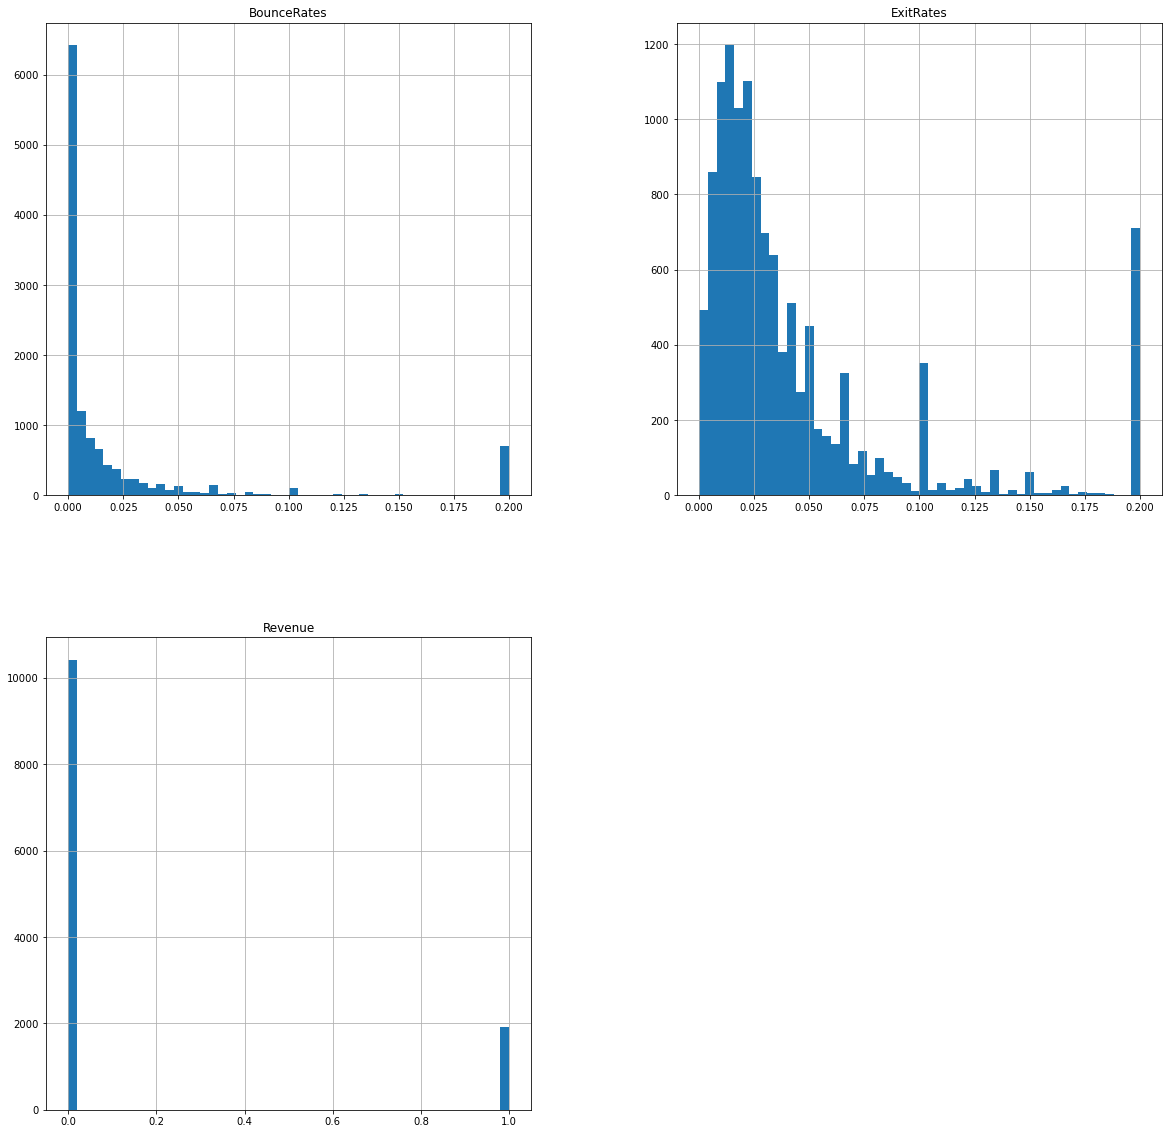


 scatter_matrix: 



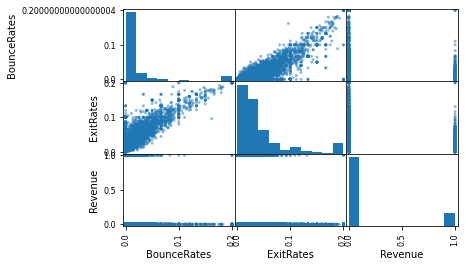


  dataset_encoded Correlation heatmap: 



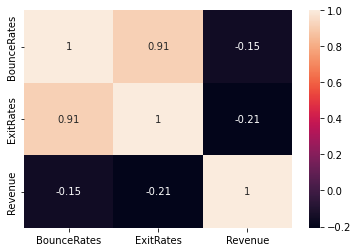

In [10]:
#data_neg_corr_revenue = dataset_encoded[dataset_encoded[], dataset_encoded[]]
data_neg_corr_revenue = dataset_encoded.loc[:, ['BounceRates', 'ExitRates',  'Revenue']]

# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(data_neg_corr_revenue.describe()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n dataset_encoded plot: \n")
data_neg_corr_revenue.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
plt.show()


# To visualise as a histogram: hist
print("\n  dataset_encoded hist: \n")
data_neg_corr_revenue.hist(bins=50, figsize=(20,20))
plt.show()


# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n scatter_matrix: \n")
scatter_matrix(frame=data_neg_corr_revenue)
plt.show()



#Correlation matrix
corrMatrix = data_neg_corr_revenue.corr()
#mask = numpy.zeros_like(corrMatrix)
#mask[numpy.triu_indices_from(mask)] = True
#print (corrMatrix)
print("\n  dataset_encoded Correlation heatmap: \n")
import seaborn as sn
#plt.figure(figsize=(15, 15))
#sn.heatmap(corrMatrix, annot=True, mask=mask)
sn.heatmap(corrMatrix, annot=True)
plt.show()





# Spilt data to train and test


In [11]:
X = data_neg_corr_revenue.values[:, 0:2]
y = data_neg_corr_revenue.values[:, 2]
test_size = 0.09
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11220, 2)
(11220,)
(1110, 2)
(1110,)


In [12]:
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#print(kfold)

for k in range(2,25,1):
    cv_results_knn = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=k, weights='uniform'), X_train, y_train, cv=kfold)
    print("KNN: k=", k, "accuracy mean = ", cv_results_knn.mean())


for tolerance in [1e-1, 1e-2, 1e-3, 1e-4]:    
    cv_results_svc = model_selection.cross_val_score(LinearSVC(tol=tolerance, dual = False), X_train, y_train, cv=kfold)
    print("SVC: tol= ",tolerance, "accuracy mean = ", cv_results_svc.mean())

KNN: k= 2 accuracy mean =  0.8288770053475936
KNN: k= 3 accuracy mean =  0.8059714795008913
KNN: k= 4 accuracy mean =  0.8366310160427807
KNN: k= 5 accuracy mean =  0.8254010695187166
KNN: k= 6 accuracy mean =  0.8390374331550803
KNN: k= 7 accuracy mean =  0.8334224598930481
KNN: k= 8 accuracy mean =  0.8411764705882353
KNN: k= 9 accuracy mean =  0.8364527629233512
KNN: k= 10 accuracy mean =  0.8420677361853832
KNN: k= 11 accuracy mean =  0.8401960784313726
KNN: k= 12 accuracy mean =  0.8437611408199643
KNN: k= 13 accuracy mean =  0.8425133689839571
KNN: k= 14 accuracy mean =  0.8436720142602496
KNN: k= 15 accuracy mean =  0.8427807486631016
KNN: k= 16 accuracy mean =  0.844295900178253
KNN: k= 17 accuracy mean =  0.8435828877005347
KNN: k= 18 accuracy mean =  0.8445632798573974
KNN: k= 19 accuracy mean =  0.8434937611408199
KNN: k= 20 accuracy mean =  0.8446524064171121
KNN: k= 21 accuracy mean =  0.8437611408199641
KNN: k= 22 accuracy mean =  0.844830659536542
KNN: k= 23 accuracy mea

In [13]:
print(Y_test.shape)

# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')
knn.fit(X_train_scaled, Y_train)
knn_predictions = knn.predict(X_test_scaled)

print("\n KNN Y_test: " + str(Y_test))
print("\n KNN knn_predictions: " + str(knn_predictions))
print("\nThe KNN accuracy score is: " + str(accuracy_score(Y_test, knn_predictions)))
#print("features ",  knn.n_features_in_)
#print("n_samples_fit_ ",  knn.n_samples_fit_)


# Make predictions on validation dataset
lin_svc = LinearSVC(tol = 0.1, dual = False)
lin_svc.fit(X_train_scaled, Y_train)
lin_svc_predictions = lin_svc.predict(X_test_scaled)

print("\n LinearSVC Y_test: " + str(Y_test))
print("\n LinearSVC lin_svc_predictions: " + str(lin_svc_predictions))
print("\nThe LinearSVC accuracy score is: " + str(accuracy_score(y_test, lin_svc_predictions)))

NameError: name 'Y_test' is not defined

# Take the features that have +ve correlation to revenue

In [ ]:
## data_neg_corr_revenue = dataset_encoded[dataset_encoded[], dataset_encoded[]]
data_positive_corr_revenue = dataset_encoded.loc[:, ['Administrative', 'ProductRelated',  'ProductRelated_Duration', 'PageValues' ,'Month','Revenue']]

# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(data_positive_corr_revenue.describe()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n data_positive_corr_revenue plot: \n")
data_positive_corr_revenue.plot(kind='box', subplots=True, layout=(2, 3), figsize=(10,10), sharex=False, sharey=False)
plt.show()


# To visualise as a histogram: hist
print("\n  data_positive_corr_revenue hist: \n")
data_positive_corr_revenue.hist(bins=50, figsize=(20,20))
plt.show()


# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n scatter_matrix: \n")
scatter_matrix(frame=data_positive_corr_revenue, figsize=(20,20))
plt.show()



#Correlation matrix
corrMatrix_pos_rev = data_positive_corr_revenue.corr()
mask = numpy.zeros_like(corrMatrix_pos_rev)
mask[numpy.triu_indices_from(mask)] = True
#print (corrMatrix)
print("\n  data_positive_corr_revenue Correlation heatmap: \n")
import seaborn as sn
plt.figure(figsize=(10, 10))
sn.heatmap(corrMatrix_pos_rev, annot=True, mask=mask)
#sn.heatmap(corrMatrix, annot=True)
plt.show()



# Winsorize the outliers

In [ ]:
from scipy.stats.mstats import winsorize

for col_name in data_positive_corr_revenue:
    winsorize(data_positive_corr_revenue[col_name], limits=[0.05, 0.05], inplace=True)
    
    
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(data_positive_corr_revenue.describe()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n data_positive_corr_revenue plot: \n")
data_positive_corr_revenue.plot(kind='box', subplots=True, layout=(2, 3), figsize=(10,10), sharex=False, sharey=False)
plt.show()

# Classify data based on revenue

In [ ]:
X = data_positive_corr_revenue.values[:, 0:4]
y = data_positive_corr_revenue.values[:, 4]
test_size = 0.09
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Run classifiers

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#print(kfold)

for k in range(2,25,1):
    cv_results_knn = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=k, weights='uniform'), X_train, y_train, cv=kfold)
    print("KNN: k=", k, "accuracy mean = ", cv_results_knn.mean())


for tolerance in [1e-1, 1e-2, 1e-3, 1e-4]:    
    cv_results_svc = model_selection.cross_val_score(LinearSVC(tol=tolerance, dual = False), X_train, y_train, cv=kfold)
    print("SVC: tol= ",tolerance, "accuracy mean = ", cv_results_svc.mean())

# scale the data

In [ ]:
x_data_positive_corr_revenue_scaler = StandardScaler().fit(X_train)
X_train_scaled = x_data_positive_corr_revenue_scaler.transform(X_train)
print(X_train_scaled)
print(X_train_scaled.shape)

# Run classifier on scaled train data

# Scale the test data and test

In [ ]:
print(X_test)
print(X_test.shape)
X_test_scaled = x_data_positive_corr_revenue_scaler.transform(X_test)
print(x_test_scaled)



print(Y_test.shape)

# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=22, weights='uniform')
knn.fit(X_train_scaled, Y_train)
knn_predictions = knn.predict(X_test_scaled)

print("\n KNN Y_test: " + str(Y_test))
print("\n KNN knn_predictions: " + str(knn_predictions))
print("\nThe KNN accuracy score is: " + str(accuracy_score(Y_test, knn_predictions)))
#print("features ",  knn.n_features_in_)
#print("n_samples_fit_ ",  knn.n_samples_fit_)


# Make predictions on validation dataset
lin_svc = LinearSVC(tol = 0.1, dual = False)
lin_svc.fit(X_train_scaled, Y_train)
lin_svc_predictions = lin_svc.predict(X_test_scaled)

print("\n LinearSVC Y_test: " + str(Y_test))
print("\n LinearSVC lin_svc_predictions: " + str(lin_svc_predictions))
print("\nThe LinearSVC accuracy score is: " + str(accuracy_score(Y_test, lin_svc_predictions)))